# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Setup Steps

In [0]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2001337" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9003201490" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="09_Entropy_Animals" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Test.csv.zip")
    ipython.magic("sx unzip Test.csv.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return


def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
     # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [0]:
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("Test.csv").values

In [8]:
data

array([[ 23.16 , 150.44 ,   0.   ],
       [ 33.49 , 146.14 ,   0.   ],
       [ 40.37 , 138.39 ,   0.   ],
       [ 44.67 , 128.92 ,   0.   ],
       [ 35.21 , 116.02 ,   0.   ],
       [ 25.16 , 106.56 ,   0.   ],
       [ 30.05 , 133.23 ,   0.   ],
       [ 24.02 , 122.91 ,   0.   ],
       [ 13.7  , 124.62 ,   0.   ],
       [ 22.3  , 136.67 ,   0.   ],
       [ 50.69 ,  81.6  ,   1.   ],
       [ 68.76 ,  67.84 ,   1.   ],
       [ 72.25 ,  58.34 ,   1.   ],
       [ 84.25 ,  43.75 ,   1.   ],
       [ 57.58 ,  60.1  ,   1.   ],
       [ 61.88 ,  45.47 ,   1.   ],
       [ 49.84 ,  36.01 ,   1.   ],
       [ 51.56 ,  53.21 ,   1.   ],
       [ 47.26 ,  65.26 ,   1.   ],
       [ 36.93 ,  54.94 ,   1.   ],
       [ 50.69 , 117.74 ,   2.   ],
       [ 57.58 , 103.98 ,   2.   ],
       [ 70.49 ,  85.05 ,   2.   ],
       [ 67.904,  97.09 ,   2.   ],
       [ 64.46 , 110.86 ,   2.   ],
       [ 75.69 , 107.42 ,   2.   ],
       [ 79.09 ,  93.66 ,   2.   ],
       [ 92.85 ,  92.79 ,   

In [0]:
X = data[:,0]
y = data[:,1]

In [12]:
y

array([150.44 , 146.14 , 138.39 , 128.92 , 116.02 , 106.56 , 133.23 ,
       122.91 , 124.62 , 136.67 ,  81.6  ,  67.84 ,  58.34 ,  43.75 ,
        60.1  ,  45.47 ,  36.01 ,  53.21 ,  65.26 ,  54.94 , 117.74 ,
       103.98 ,  85.05 ,  97.09 , 110.86 , 107.42 ,  93.66 ,  92.79 ,
       103.98 , 116.02 ,  79.02 ,  64.4  ,  43.75 ,  60.9  ,  73.86 ,
        59.24 ,  73.   ,  57.52 ,  68.7  ,  77.43 , 136.67 , 126.35 ,
       113.44 , 126.35 , 132.37 , 128.93 , 116.8  , 107.42 , 107.42 ,
       116.02 , 128.07 , 130.65 , 118.61 , 117.72 , 118.6  , 127.21 ,
       113.44 , 126.35 , 110.86 , 118.61 , 128.07 , 100.54 , 105.7  ,
       109.141, 103.9  , 119.47 , 139.25 , 112.58 , 125.49 , 133.23 ,
       146.14 , 107.42 , 118.61 , 134.95 , 148.72 , 131.51 , 142.67 ,
       159.04 , 151.3  , 138.39 , 128.9  , 143.56 , 153.02 , 164.2  ,
       175.4  , 178.83 , 167.65 , 183.13 , 171.95 , 184.86 , 190.03 ])

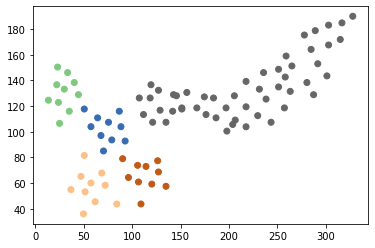

In [13]:
plt.scatter(X,y, c=data[:,2], cmap="Accent")
plt.show()

Entropy $H$ = $-\sum_{i}P_{i}\log_{2}(P_{i})$ where $P_{i}$ is the probability of the $i$ th class.

Total number of data points = $91$
 
 Total number of classes = $5$

Here, we are considering $P_{i}$ as following:

$P_{i}$ = number of data points in $i$ th class/Total number of data points

Initial Entropy = $-\frac{10}{91}\log_{2}(\frac{10}{91})- \frac{10}{91}\log_{2}(\frac{10}{91}) -\frac{10}{91}\log_{2}(\frac{10}{91})-\frac{10}{91}\log_{2}(\frac{10}{91}) - \frac{51}{91}\log_{2}(\frac{51}{91})$ =
$-4\times\frac{10}{91}\log_{2}(\frac{10}{91}) - \frac{51}{91}\log_{2}(\frac{51}{91})$ = $13.579$

#### Exercise 1

Calculating the entropy when the data is split at  $X=150$

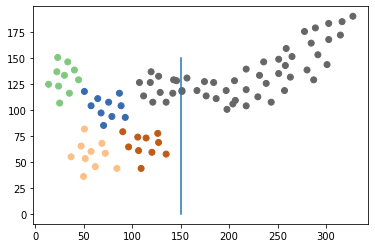

In [14]:
# X > 150
plt.scatter(X,y, c=data[:,2],cmap="Accent")
plt.plot([150,150],[150,0])
plt.show()

In this example, we have $5$ classes on left and $1$ class on right of $X=150$. 

Left side Entropy = $-\frac{10}{51}\log_{2}(\frac{10}{51}) -\frac{10}{51}\log_{2}(\frac{10}{51})-\frac{10}{51}\log_{2}(\frac{10}{51})-\frac{10}{51}\log_{2}(\frac{10}{51})- \frac{11}{51}\log_{2}(\frac{11}{51})$ =$-4\times\frac{10}{51}\log_{2}(\frac{10}{51}) - \frac{11}{51}\log_{2}(\frac{11}{51}) = 2.322$

Right side Entropy = $-\frac{40}{40}\log_{2}(\frac{40}{40}) = -1\log_{2}(1) = 0$

Total Entropy = Left side Entropy + Right side Entropy = $(\frac{51}{91})2.322 +(\frac{40}{91}) 0 = 1.301$

#### Exercise 2

Calculating the entropy when the data is split at  $X=100$



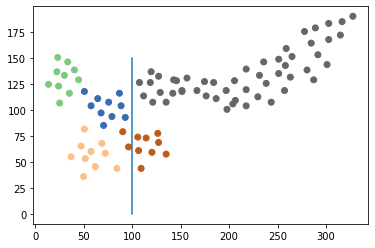

In [15]:
#X > 100
plt.scatter(X,y, c=data[:,2],cmap="Accent")
plt.plot([100,100],[150,0])
plt.show()

Entropy $H$ = $-\sum_{i}P_{i}\log_{2}(P_{i})$ where $P_{i}$ is the probability of the $i$ th class.

Total number of data points = $91$

For calculating total entropy, lets consider data on both right and left of $X=100$.

We have $4$ classes on left and $2$ classes on right. 

Here, we are considering $P_{i}$ as following:

$P_{i}$ = number of data points in $i$ th class/Total number of points in the left/right side of the split.

Left side Entropy = $-\frac{10}{32}\log_{2}(\frac{10}{32})- \frac{10}{32}\log_{2}(\frac{10}{32}) -\frac{10}{32}\log_{2}(\frac{10}{32}) - \frac{2}{32}\log_{2}(\frac{2}{32})$ =
$-3\times\frac{10}{32}\log_{2}(\frac{10}{32}) - \frac{2}{32}\log_{2}(\frac{2}{32})$ = $1.823$

Right side Entropy = $-\frac{8}{59}\log_{2}(\frac{8}{59}) - \frac{51}{59}\log_{2}(\frac{51}{59})$ =$ 0.571$

Total Entropy = Left side Entropy + Right side Entropy = $(\frac{32}{91})1.823 +(\frac{59}{91})0.571=1.011$

#### Exercise 3

Calculating the entropy when the data is split at  $y=85$

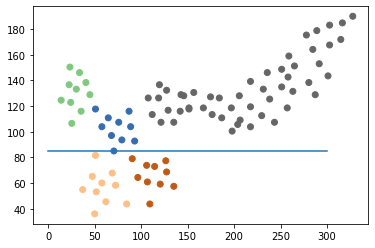

In [16]:
# y > 85
plt.scatter(X,y, c=data[:,2],cmap="Accent")
plt.plot([0,300],[85,85])
plt.show()

In this example, for calculating total entropy, lets consider data on both below and above of $y=85$.

We have $2$ classes below and $3$ classes on above. 

Below Entropy = $-\frac{10}{20}\log_{2}(\frac{10}{20})-\frac{10}{20}\log_{2}(\frac{10}{20})$=$-2\times\frac{10}{20}\log_{2}(\frac{10}{20}) = 1$

Above Entropy = $-\frac{10}{71}\log_{2}(\frac{10}{71})- \frac{10}{71}\log_{2}(\frac{10}{71})- \frac{51}{71}\log_{2}(\frac{51}{71}) $=$-2\times\frac{10}{71}\log_{2}(\frac{10}{71}) - \frac{51}{71}\log_{2}(\frac{51}{71}) = 1.336$ 

Total Entropy = Below Entropy + Above Entropy = $(\frac{20}{91})1 +(\frac{71}{91}) 1.336 = 1.262$

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Nicely Explained" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [0]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [21]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 573
Date of submission:  02 Feb 2020
Time of submission:  13:07:19
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
